I try to test the edf data

# Import pkgs

In [2]:
import sys
sys.path.append("../mypkg")
from constants import RES_ROOT, FIG_ROOT, DATA_ROOT

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
import torch
import torch.nn as nn
import pyedflib
from pyedflib import highlevel

# Load data

In [31]:
edf_trains = list(DATA_ROOT.glob("EEG_seizure/edf/train/*"))

In [36]:
ps = []
for px in edf_trains:
    for p in  px.rglob("0*"):
        ps.append(p)

In [40]:
import pandas as pd

In [46]:
fil =  list(ps[0].rglob("*[0-9].csv"))[1]
fil

PosixPath('/data/rajlab1/user_data/jin/MyResearch/gTVDN-NN/notebooks/../mypkg/../data/EEG_seizure/edf/train/aaaaaaac/s001_2002_12_23/02_tcp_le/aaaaaaac_s001_t001.csv')

In [49]:
with open(fil, "r") as f:
    tt = f.readlines()

In [53]:
pd.read_csv(fil, sep=",", skiprows=5)

,channel,start_time,stop_time,label,confidence
0,FP1-F7,0.0000,12.0764,bckg,1.0
1,FP1-F7,12.0764,134.1667,cpsz,1.0
2,FP1-F7,134.1667,236.0000,bckg,1.0
3,F7-T3,0.0000,12.0764,bckg,1.0
4,F7-T3,12.0764,134.1667,cpsz,1.0
...,...,...,...,...,...
61,C4-P4,12.0764,140.3512,cpsz,1.0
62,C4-P4,140.3512,236.0000,bckg,1.0
63,P4-O2,0.0000,12.0764,bckg,1.0
64,P4-O2,12.0764,140.3512,cpsz,1.0


In [37]:
len(ps)

1175

In [47]:
path_sample_edf = list(list(list(edf_trains[1].glob("*"))[0].glob("*"))[0].glob("*.edf"))[0]
path_sample_edf

PosixPath('/data/rajlab1/user_data/jin/MyResearch/gTVDN-NN/mypkg/../data/EEG_seizure/edf/train/aaaaaaag/s004_2007_02_02/03_tcp_ar_a/aaaaaaag_s004_t000.edf')

In [48]:
data = highlevel.read_edf(str(path_sample_edf))

# Check it 

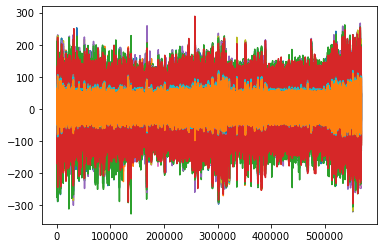

In [49]:
seqs = data[0]
for ix in range(seqs.shape[0]):
    plt.plot(seqs[ix])

In [55]:
seqs.shape

(32, 568400)

In [51]:
[ix['label'] for ix in data[1]]

['EEG FP1-REF',
 'EEG FP2-REF',
 'EEG F3-REF',
 'EEG F4-REF',
 'EEG C3-REF',
 'EEG C4-REF',
 'EEG P3-REF',
 'EEG P4-REF',
 'EEG O1-REF',
 'EEG O2-REF',
 'EEG F7-REF',
 'EEG F8-REF',
 'EEG T3-REF',
 'EEG T4-REF',
 'EEG T5-REF',
 'EEG T6-REF',
 'EEG FZ-REF',
 'EEG CZ-REF',
 'EEG PZ-REF',
 'EEG 20-REF',
 'EEG 21-REF',
 'EEG 22-REF',
 'EEG 23-REF',
 'EEG 24-REF',
 'EEG 25-REF',
 'EEG 26-REF',
 'EEG 27-REF',
 'EEG 28-REF',
 'EEG 29-REF',
 'EEG 30-REF',
 'EEG 31-REF',
 'EEG 32-REF']